# Исследование компьютерных игр
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xboxили PlayStation). Вам нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.

# 1 Изучение данных из файла

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from scipy import stats as st

In [2]:
import warnings 
    
warnings.simplefilter('ignore')

In [3]:
# Открываем файл и выводим первые 10 строк
data = pd.read_csv('/datasets/games.csv')
display(data.head(10))
# Вызываем функцию info() для оценки заполненности таблицы, соответствия типов данных столбцов хранимым в них значениях
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# проверим содержимое столбцов с категориальными значениями
columns = ['Name', 'Platform', 'Genre', 'Rating', 'User_Score']
for column in columns:
    display(data[column].value_counts())

Need for Speed: Most Wanted               12
LEGO Marvel Super Heroes                   9
FIFA 14                                    9
Ratatouille                                9
Madden NFL 07                              9
                                          ..
Pirates: Legend of the Black Buccaneer     1
Capcom Classics Collection Reloaded        1
Starry ? Sky: In Summer                    1
Fighting Vipers 2                          1
Cold Stone Creamery: Scoop It Up           1
Name: Name, Length: 11559, dtype: int64

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.3       2
0.2       2
9.6       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64

**Вывод**:
1. Пропуски имеются в столбцах Name(2 пропуска), Year_of_Release, Genre(2 пропуска), Critic_Score, User_Score, Rating.
2. Столбец Year_of_Release имеет тип float64 (привести к int),  User_Score имеет тип object (привести к float).

# 2 Предобработка данных

In [5]:
#Заменим названия столбцов (
data = data.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre':'genre',
                'NA_sales': 'na_sales',
                'EU_sales': 'eu_sales',
                'JP_sales': 'jp_sales',
                'Other_sales': 'other_sales',
                'Critic_Score': 'critic_score',
                'User_Score': 'user_score',
                'Rating': 'rating'}) 
display(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
# Посчитаем количество пропусков
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропусками в столбцах name, year_of_release, genre можно пренебречь, тк их менее 2%. Пропуски в столбцах critic_score, user_score лучше не заполнять, чтобы не исказить данные. Эти пропуски связаны, видимо, с недостаточным количеством оценок, либо с ошибкой при выгрузке данных, либо игры новые и у них еще нет оценок. Пропуски в столбце rating заполним значением "не определен"

In [7]:
data['rating'] = data['rating'].fillna('не определен')

In [8]:
#tbd в столбце user_score= To Be Determined, т.е.рейтинг еще не определен, заменим эти значения на NaN
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')
data['user_score'].isna().sum()

9125

In [9]:
# В столбце year_of_release менять тип данных не целесообразно, тк он ни на что не повлияет. Изменим тип данных столбца user_score
#Преобразуем данные в нужные типы
data['user_score'] = data['user_score'].astype('float64')
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


None

In [10]:
#Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,не определен,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,не определен,31.38


**Вывод**: обработали пропуски в столбце 'rating' - заменили на значение "не определен", проанализировали пропуски в столбцах name, year_of_release, genre, заменили значения "tbd" из столбца 'user_score' на NaN, данные по оценкам пользователей и критиков отфильтруем позже, изменили тип данных, где было целесообразно, добавили столбец с суммарными продажами. Таким образом, мы подготовили датасет к дальнейшему анализу.

# 3 Исследовательский анализ данных

<AxesSubplot:xlabel='year_of_release'>

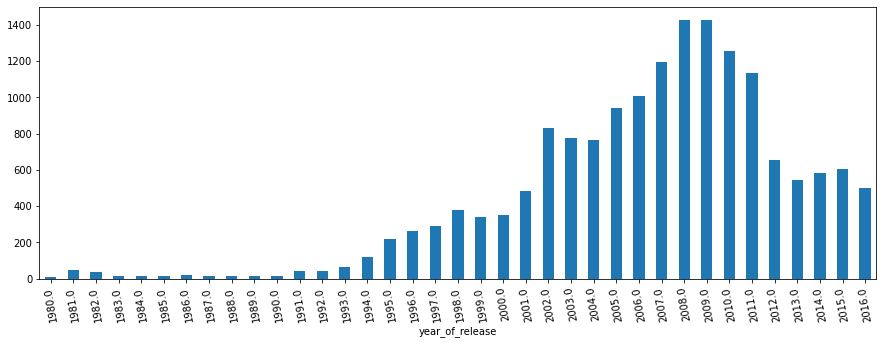

In [11]:
#Посмотрим, сколько игр выпускалось в разные годы
data.groupby('year_of_release')['year_of_release'].count().plot(kind='bar', rot=100, figsize=(15,5))

Вывод: до 1995 года количество игр небольшое, поэтому анализ этих годов не показателен для прогнозирования.

In [12]:
# отбросим данные до 1995 года
data=data[data['year_of_release'] >= 1995]

In [13]:
#Посмотрим платформы с наибольшими суммарными продажами
top_10 = data.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by = 'total_sales').tail(10).index
display(top_10)

Index(['3DS', 'PSP', 'GBA', 'PS4', 'PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2'], dtype='object', name='platform')

<AxesSubplot:xlabel='year_of_release'>

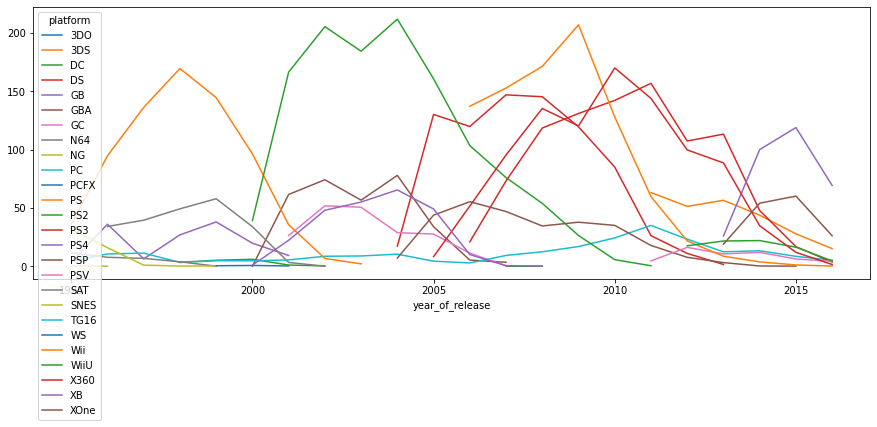

In [14]:
#Построим распределение по годам
data.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum' ).plot(figsize=(15,5))

In [15]:
# Установим минимальные значения продажи в миллионах, чтобы отбросить данные с медленным угасанием продаж по платформе
min_sales = 10
# суммарные продажи в год выше порога
report = data.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).query('total_sales > @min_sales')
# посмотрим время жизни каждой платформы
report = report.reset_index().groupby('platform').agg({'year_of_release': 'nunique'})
display(report)
# определим средний период актуальности платформы - среднее число лет выше порога продаж, деленное на 2,
# т.к. половину жизни платформа падает
report.mean()/2

,year_of_release
platform,
3DS,6
DS,9
GB,4
GBA,5
GC,6
N64,5
PC,10
PS,7
PS2,10


year_of_release    3.0
dtype: float64

Вывод: Средний жиненный цикл платформы - 6 лет. Половину из этого срока продажи по платформе падают, таким образом, актуальным периодом для прогноза на 2017 год следует считать период с 2013 по 2016гг.

In [16]:
# Сделаем срез по актуальному периоду
data = data.query('year_of_release >= 2013')
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   float64
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(8), object(4)
memory usage: 226.8+ KB


None

['X360', '3DS', 'XOne', 'PS3', 'PS4']

<AxesSubplot:xlabel='year_of_release'>

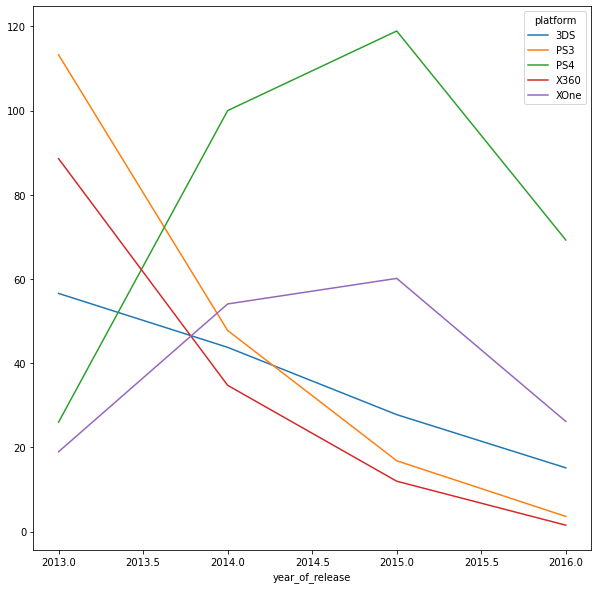

In [17]:
# Выберем пять наиболее прибыльных платформ
top_5 = list(data.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by = 'total_sales').tail(5).index)
display(top_5)
data_top_5 = data.query('platform in @top_5')
#Построим распределение по годам
data_top_5.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum' ).plot(figsize=(10,10))

Вывод: таким образом, исходя из графика, потенциально прибыльные платформы - PS4, XOne, 3DS.

In [18]:
top_3 = ['PS4', 'XOne', '3DS']
data_top_3 = data.query('platform in @top_3')

Text(0.5, 0.98, '')

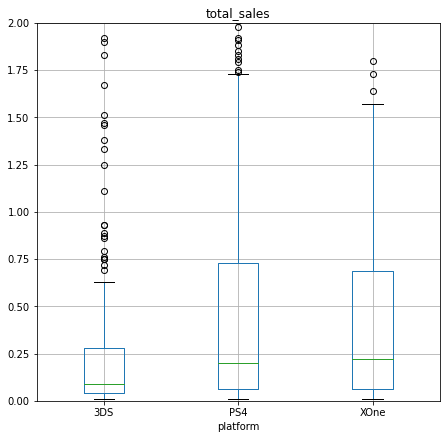

In [19]:
#Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

data_top_3.boxplot(column = 'total_sales', by = 'platform', figsize=(7,7));
plt.ylim(0, 2)
plt.suptitle('')

**Вывод**: Судя по медианным продажам выбранных потенциально прибыльных платформ, больше всего продаж у XOne (0.25), меньше - у 3DS (0.075).

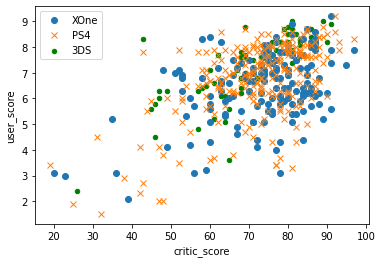

In [20]:
#Посмотрим, как соотносятся отзывы пользователей и критиков
data_filtered = data.dropna()
data_XOne = data_filtered[data_filtered['platform'] == 'XOne']
data_PS4 = data_filtered[data_filtered['platform'] == 'PS4']
data_3DS = data_filtered[data_filtered['platform'] == '3DS']
ax = data_XOne.plot(x='critic_score', y='user_score', style='o', label='XOne')
data_PS4.plot(x='critic_score', y='user_score', style='x', ax=ax, label='PS4')
data_3DS.plot(kind='scatter', x='critic_score', y='user_score', color='green', ax=ax, label='3DS')
plt.legend()

Вывод: имеется тенденция к совпадению оценок пользователей и критиков.

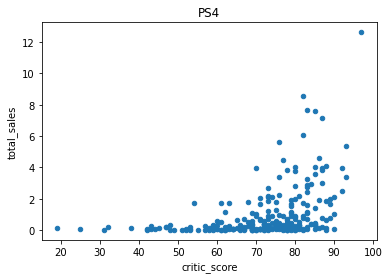

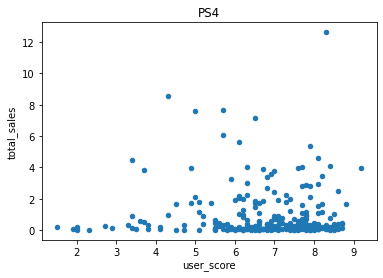

0.40589480145836687
-0.03362497596528878


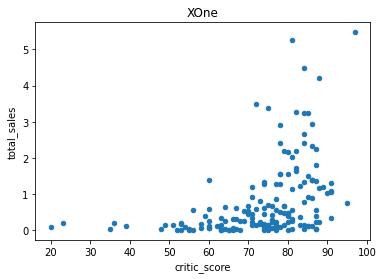

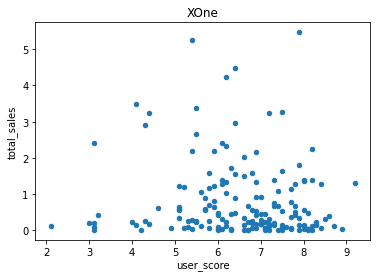

0.41042203561296375
-0.09400318326920852


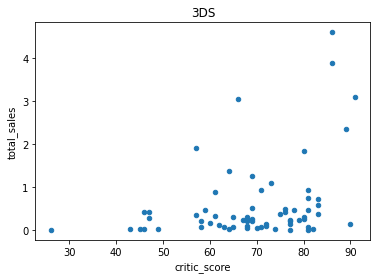

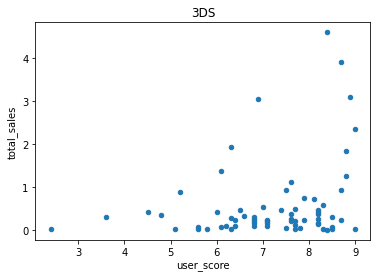

0.3392349287853147
0.2729904366942444


In [21]:
# Посмотрим зависимость продаж от оценок на трех платформах
for platform in top_3:
    data_filtered.query('platform == @platform').plot(kind='scatter', x='critic_score', y='total_sales')
    plt.title(platform)
    plt.show()
    data_filtered.query('platform == @platform').plot(kind='scatter', x='user_score', y='total_sales')
    plt.title(platform)
    plt.show()
    print(data_filtered.query('platform == @platform')['critic_score'].corr(data_filtered.query('platform == @platform')['total_sales']))
    print(data_filtered.query('platform == @platform')['user_score'].corr(data_filtered.query('platform == @platform')['total_sales']))

Вывод: Коэффициент корреляции между оценками пользователей на платформах PS4 и XOne стремится к нулю, что говорит о нелинейном характере связи. Оценки критиков на выбранных платформах сильнее влияют на успешность игр - коэффициенты корреляции более значимы.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(1, 0, 'Action'),
  Text(2, 0, 'Adventure'),
  Text(3, 0, 'Fighting'),
  Text(4, 0, 'Misc'),
  Text(5, 0, 'Platform'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Role-Playing'),
  Text(8, 0, 'Shooter'),
  Text(9, 0, 'Simulation'),
  Text(10, 0, 'Sports'),
  Text(11, 0, 'Strategy')])

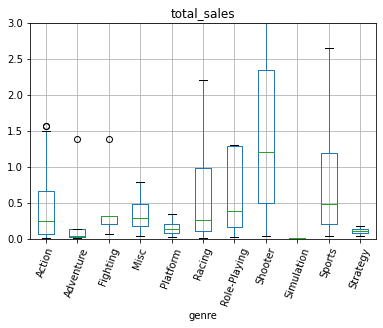

In [22]:
#Построим диаграмму размаха по глобальным продажам игр в разбивке по жанрам

data_XOne.boxplot(column = 'total_sales', by = 'genre');
plt.ylim(0, 3)
plt.suptitle('')
plt.xticks(rotation='70')

Вывод: наиболее прибыльный жанр - Shooter, наименее - adventure, simulation.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'Action'),
  Text(2, 0, 'Adventure'),
  Text(3, 0, 'Fighting'),
  Text(4, 0, 'Misc'),
  Text(5, 0, 'Platform'),
  Text(6, 0, 'Puzzle'),
  Text(7, 0, 'Racing'),
  Text(8, 0, 'Role-Playing'),
  Text(9, 0, 'Shooter'),
  Text(10, 0, 'Simulation'),
  Text(11, 0, 'Sports'),
  Text(12, 0, 'Strategy')])

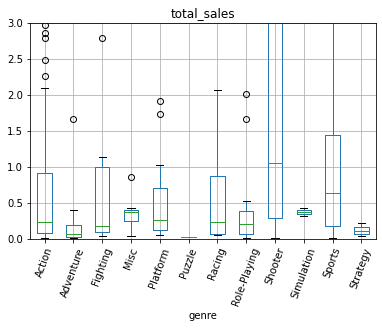

In [23]:
data_PS4.boxplot(column = 'total_sales', by = 'genre');
plt.ylim(0, 3)
plt.suptitle('')
plt.xticks(rotation='70')

Вывод: наиболее прибыльный жанр - так же Shooter, наименее - adventure, puzzle.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, 'Action'),
  Text(2, 0, 'Adventure'),
  Text(3, 0, 'Fighting'),
  Text(4, 0, 'Misc'),
  Text(5, 0, 'Platform'),
  Text(6, 0, 'Puzzle'),
  Text(7, 0, 'Role-Playing'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Strategy')])

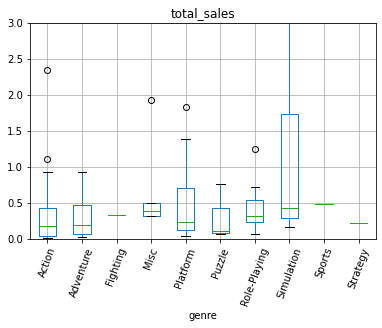

In [24]:
data_3DS.boxplot(column = 'total_sales', by = 'genre');
plt.ylim(0, 3)
plt.suptitle('')
plt.xticks(rotation='70')

Вывод: наиболее прибыльный жанр - misc, simulation, наименее - puzzle.

Таким образом, у каждой платформы имеются жанры с высокими и низкими продажами, однако, у каждой они свои.

**Вывод**:
1. Выяснили, что актуальным периодом для прогноза на 2017 год следует считать период с 2013 по 2016гг. 
2. Потенциально прибыльные платформы - PS4, XOne, 3DS.
3. Имеется тенденция к совпадению оценок пользователей и критиков.
4. Оценки критиков на выбранных платформах сильнее влияют на успешность игр - коэффициенты корреляции более значимы.
5. У каждой платформы имеются жанры с высокими и низкими продажами, однако, у каждой они свои.

# 4 Составление портрета пользователя каждого региона

In [25]:
# Определим самые популярные платформы для пользователей каждого региона
def get_top_5(region):
    report = data.groupby('platform').agg({region: 'sum'})
    report['% of total'] = report[region] / report[region].sum()
    return report.sort_values(by = region, ascending=False).head(5)
    
display(get_top_5('na_sales'))
display(get_top_5('eu_sales'))
display(get_top_5('jp_sales'))

,na_sales,% of total
platform,,
PS4,108.74,0.248429
XOne,93.12,0.212744
X360,81.66,0.186562
PS3,63.50,0.145073
3DS,38.20,0.087272


,eu_sales,% of total
platform,,
PS4,141.09,0.359712
PS3,67.81,0.172883
XOne,51.59,0.131530
X360,42.52,0.108406
3DS,30.96,0.078933


,jp_sales,% of total
platform,,
3DS,67.81,0.481674
PS3,23.35,0.165862
PSV,18.59,0.132050
PS4,15.96,0.113368
WiiU,10.88,0.077284


Вывод: В Северной Америке и в Европе в продажах преобладает платформа PS4, а в Японии - платформа 3DS (PS4 лишь на 4-ом месте). В Северной Америке на втором месте - платформа XOne (уступает PS4 всего лишь 4%), тогда как в Европе на втором месте платформа PS3 с отрывом уже в 19%.

In [26]:
# Определим самые популярные жанры для пользователей каждого региона

def get_top_5(region):
    top_5 = list(data.groupby('genre').agg({region: 'sum'}).sort_values(by = region).tail(5).index) 
    display(top_5)
    
get_top_5('na_sales')
get_top_5('eu_sales')
get_top_5('jp_sales')

['Misc', 'Role-Playing', 'Sports', 'Shooter', 'Action']

['Racing', 'Role-Playing', 'Sports', 'Shooter', 'Action']

['Shooter', 'Fighting', 'Misc', 'Action', 'Role-Playing']

Вывод: В Северной Америке на первом месте по популярности жанр Misc, в Европе - Racing, далее на 2-5 местах жанры одинаковые.В Японии популярные жанры значимо отличаются.

In [27]:
# Определим, какой рейтинг ESRB преобладает для пользователей каждого региона

def get_top_5(region):
    report = data.groupby('rating').agg({region: 'sum'})
    report['% of total'] = report[region] / report[region].sum()
    return report.sort_values(by = region, ascending=False).head(5)
    
display(get_top_5('na_sales'))
display(get_top_5('eu_sales'))
display(get_top_5('jp_sales'))

,na_sales,% of total
rating,,
M,165.21,0.377442
не определен,89.42,0.204291
E,79.05,0.180599
E10+,54.24,0.123918
T,49.79,0.113751


,eu_sales,% of total
rating,,
M,145.32,0.370497
E,83.36,0.212528
не определен,78.91,0.201183
E10+,42.69,0.108839
T,41.95,0.106953


,jp_sales,% of total
rating,,
не определен,85.05,0.604134
T,20.59,0.146257
E,15.14,0.107544
M,14.11,0.100227
E10+,5.89,0.041838


Вывод: В Северной Америке и в Европе на продажи значимо влияет категория М(старше 17 лет) системы рейтинга ESRB, в Японии невозможно это оценить ввиду того, что на первом месте рейтинг "не определен".

**Вывод**:
1. В Северной Америке и в Европе схожий портрет пользователя: в продажах преобладает платформа PS4, в жанрах преобладают 'Role-Playing', 'Sports', 'Shooter', 'Action' (однако, в Северной Америке на первом месте по популярности жанр Misc, в Европе - Racing), на продажи значимо влияет категория М(старше 17 лет) системы рейтинга ESRB.
2. В Японии преобладает в продажах платформа 3DS, самые популярные жанры - 'Shooter', 'Fighting'. Такие отличия связаны, видимо, с разницей культур.

# 5 Проверка гипотез

Формулируем нулевую гипотезу для условия равенства. Для проверки двусторонних гипотез используем t-тест.

Нулевая гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [28]:
# Подготовим датасеты с данными по платформам Xbox One и PC.
data_XOne = data_filtered[data_filtered['platform'] == 'XOne']
data_PC = data_filtered[data_filtered['platform'] == 'PC']

In [29]:
alpha = .05
results = st.ttest_ind(
    data_XOne['user_score'], 
    data_PC['user_score'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.17306926618147322
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза 2: Средние пользовательские рейтинги жанров Action (англ. «действие», экшенигры) и Sports (англ. «спортивные соревнования») одинаковые.

Альтернативная гипотеза 2: Средние пользовательские рейтинги жанров Action (англ. «действие», экшенигры) и Sports (англ. «спортиные соревнования») разные.

In [30]:
# Подготовим датасеты с данными по жанрам Action и Sports.
data_action = data_filtered[data_filtered['genre'] == 'Action']
data_sports = data_filtered[data_filtered['genre'] == 'Sports']

In [31]:
alpha = .05
results = st.ttest_ind(
    data_action['user_score'], 
    data_sports['user_score'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.684099430689953e-16
Отвергаем нулевую гипотезу


**Вывод**: 
1. Нет оснований считать средние пользовательские рейтинги платформ Xbox One и PC разными.
2. Разница средних пользовательских рейтингов жанров Action (англ. «действие», экшенигры) и Sports (англ. «спортиные соревнования») статистически значима.

# 6 Общий вывод 

В ходе исследования мы выяснили, что:
1. Примерно 6 лет составляет жизненный цикл платформы, а 3 года - актуальный период для анализа. Таким образом, актуальным периодом для прогноза на 2017 год следует считать период с 2013 по 2016гг.
2. Наиболее потенциально прибыльные платформы - PS4, XOne, 3DS. Из выбранных потенциально прибыльных платформ больше всего продаж у XOne, меньше - у 3DS.
3. Оценки критиков на выбранных платформах сильнее влияют на успешность игр - коэффициенты корреляции более значимы, в отличии от корреляции между оценками пользователей, которая стремится к нулю.
4. У каждой платформы имеются жанры с высокими и низкими продажами. Жанр Shooter наиболее прибылен на платформах PS4 и XOne, на 3DS это жанры Misc и Simulation, в аутсайдерах на PS4 и 3DS жанр Puzzle, на XOne - Adventure и Simulation.
5. В Северной Америке и в Европе (в отличие от Японии) схожий портрет пользователя: в продажах преобладает платформа PS4, в жанрах преобладают 'Role-Playing', 'Sports', 'Shooter', 'Action' (однако, в Северной Америке на первом месте по популярности жанр 'Misc', в Европе - 'Racing'), на продажи значимо влияет категория М(старше 17 лет) системы рейтинга ESRB.

Таким образом, наиболее прибыльными оказались платформы PS4 и XOne, на них стоит обратить внимание отделу маркетинга. А среди жанров игр наиболее перспективными являются 'Misc', 'Racing', 'Role-Playing', 'Sports', 'Shooter', 'Action'.